In [3]:
import re
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import wandb

# Initialize the API
api = wandb.Api()

# Replace with your entity, project, and run ID
entity = "eleutherai"
project = "huggingface"

In [18]:
ds_A = [
    'boolq',
    'anli-r2',
    'cosmos_qa',
    'mc_taco',
    'sciq',
    'paws',
    'twitter-sentiment',
    'wic'
]

ds_B = [
    'cola',
    'dream',
    'ethics-deontology',
    'ethics-justice',
    'ethics-virtue',
    'ethics-utilitarianism',
    'hellaswag',
    'multirc',
]

ds_C = [
    'openbookqa',
    'quail',
    'quartz',
    'social_i_qa',
    'sst2',
    'sciq_with_support',
    'anthropic_hh',
    'amazon_polarity',
]

datasets = ds_A + ds_B + ds_C
ds_group = {
    **{ds: 0 for ds in ds_A},
    **{ds: 1 for ds in ds_B},
    **{ds: 2 for ds in ds_C},
}
run_names = [f"weekend_{m}_{c}" for m in range(9) for c in range(3)]
run_name_groups = [[f"weekend_{m}_{c}" for m in range(9)] for c in range(3)]
#["xent4",  "logconf4", "window4", "bigwindow", "mw_window"]
parts = ["weak", "strong", "w2s"]

In [8]:
def run_nick(run_name):
    if "weekend" in run_name:
        idx = int(run_name.split("_")[1])
        return [
            "xent",
            "logconf_80",
            "logconf",
            "entropy_80",
            "entropy",
            "window_mid",
            "window_05",
            "window_15",
            "window_30",
        ][idx]
    
    return run_name

In [6]:
# Get all runs in the project
runs = api.runs(f"{entity}/{project}")

In [9]:
filtered_runs = {}

rx = re.compile(f"({'|'.join(parts)})-({'|'.join(run_names)})-({'|'.join(datasets)})")
for run in runs:
    if rx.match(run.name):
        print(run.name)
        # get regex groups
        part, run_name, dataset = rx.match(run.name).groups()
        filtered_runs[(part, run_name, dataset)] = run

w2s-weekend_7_2-quartz-Meta-Llama-3-8B
strong-weekend_7_2-openbookqa-Meta-Llama-3-8B
strong-weekend_7_2-quartz-Meta-Llama-3-8B
weak-weekend_7_2-amazon_polarity-Qwen1.5-0.5B
weak-weekend_7_2-social_i_qa-Qwen1.5-0.5B
weak-weekend_7_2-anthropic_hh-Qwen1.5-0.5B
weak-weekend_7_2-sst2-Qwen1.5-0.5B
weak-weekend_7_2-quartz-Qwen1.5-0.5B
weak-weekend_7_2-quail-Qwen1.5-0.5B
weak-weekend_7_2-openbookqa-Qwen1.5-0.5B
w2s-weekend_7_1-ethics-utilitarianism-Meta-Llama-3-8B
w2s-weekend_7_1-ethics-justice-Meta-Llama-3-8B
w2s-weekend_7_1-ethics-deontology-Meta-Llama-3-8B
strong-weekend_7_1-multirc-Meta-Llama-3-8B
strong-weekend_7_1-hellaswag-Meta-Llama-3-8B
w2s-weekend_7_1-dream-Meta-Llama-3-8B
w2s-weekend_7_1-ethics-virtue-Meta-Llama-3-8B
strong-weekend_7_1-ethics-utilitarianism-Meta-Llama-3-8B
w2s-weekend_7_1-cola-Meta-Llama-3-8B
strong-weekend_7_1-ethics-justice-Meta-Llama-3-8B
strong-weekend_7_1-ethics-deontology-Meta-Llama-3-8B
strong-weekend_7_1-dream-Meta-Llama-3-8B
strong-weekend_7_1-cola-Meta-Lla

In [10]:
def get_auc(ds, runname, part):
    if (part, runname, ds) not in filtered_runs:
        return np.array([])
    run = filtered_runs[(part, runname, ds)]
    run = api.run(f"{entity}/{project}/{run.id}")
    return np.array(run.history()["eval/test_auroc"])


In [11]:
def unsquish(ax, ys):
    current_ylim = ax.get_ylim()
    ax.set_ylim(min(current_ylim[0], np.min(ys)), max(current_ylim[1], np.max(ys)))

In [19]:
pgrs = {}
for ds in datasets:
    pgrs[ds] = {}
    for rn in run_name_groups[ds_group[ds]]:
        try:
            aucs = [get_auc(ds, rn, part) for part in parts]
        except:
            print(ds, rn)
            continue
        if not (len(aucs[0]) == len(aucs[1]) == len(aucs[2]) > 0):
            print(ds, rn, [len(a) for a in aucs])
            continue
        # (w2s - weak) / (strong - weak)
        pgr = (aucs[2] - aucs[0]) / (aucs[1] - aucs[0])
        pgr = pgr[5::6]
        pgrs[ds][rn] = pgr

boolq weekend_0_0 [0, 0, 0]
boolq weekend_1_0 [0, 0, 0]
boolq weekend_2_0 [0, 0, 0]
boolq weekend_3_0 [0, 0, 0]
boolq weekend_4_0 [0, 0, 0]
boolq weekend_5_0 [0, 0, 0]
boolq weekend_6_0 [0, 0, 0]
boolq weekend_7_0 [0, 0, 0]
boolq weekend_8_0 [0, 0, 0]
anli-r2 weekend_0_0 [0, 0, 0]
anli-r2 weekend_1_0 [0, 0, 0]
anli-r2 weekend_2_0 [0, 0, 0]
anli-r2 weekend_3_0 [0, 0, 0]
anli-r2 weekend_4_0 [0, 0, 0]
anli-r2 weekend_5_0 [0, 0, 0]
anli-r2 weekend_6_0 [0, 0, 0]
anli-r2 weekend_7_0 [0, 0, 0]
anli-r2 weekend_8_0 [0, 0, 0]
cosmos_qa weekend_0_0 [0, 0, 0]
cosmos_qa weekend_1_0 [0, 0, 0]
cosmos_qa weekend_2_0 [0, 0, 0]
cosmos_qa weekend_3_0 [0, 0, 0]
cosmos_qa weekend_4_0 [0, 0, 0]
cosmos_qa weekend_5_0 [0, 0, 0]
cosmos_qa weekend_6_0 [0, 0, 0]
cosmos_qa weekend_7_0 [0, 0, 0]
cosmos_qa weekend_8_0 [0, 0, 0]
mc_taco weekend_0_0 [0, 0, 0]
mc_taco weekend_1_0 [0, 0, 0]
mc_taco weekend_2_0 [0, 0, 0]
mc_taco weekend_3_0 [0, 0, 0]
mc_taco weekend_4_0 [0, 0, 0]
mc_taco weekend_5_0 [0, 0, 0]
mc_taco we

/tmp/ipykernel_1305931/896632007.py:14: RuntimeWarning: invalid value encountered in divide
  pgr = (aucs[2] - aucs[0]) / (aucs[1] - aucs[0])


ethics-deontology weekend_8_1 [0, 0, 0]
ethics-justice weekend_8_1 [0, 0, 0]
ethics-virtue weekend_8_1 [0, 0, 0]
ethics-utilitarianism weekend_8_1 [0, 0, 0]
hellaswag weekend_0_1
hellaswag weekend_1_1
hellaswag weekend_2_1
hellaswag weekend_3_1
hellaswag weekend_4_1
hellaswag weekend_5_1
hellaswag weekend_6_1
hellaswag weekend_7_1
hellaswag weekend_8_1 [0, 0, 0]
multirc weekend_0_1
multirc weekend_1_1
multirc weekend_2_1
multirc weekend_3_1
multirc weekend_4_1
multirc weekend_5_1
multirc weekend_6_1
multirc weekend_7_1
multirc weekend_8_1 [0, 0, 0]
openbookqa weekend_7_2 [29, 29, 0]
openbookqa weekend_8_2 [0, 0, 0]
quail weekend_0_2
quail weekend_1_2
quail weekend_2_2
quail weekend_3_2
quail weekend_4_2
quail weekend_5_2
quail weekend_6_2
quail weekend_7_2 [55, 0, 0]
quail weekend_8_2 [0, 0, 0]
quartz weekend_8_2 [0, 0, 0]
social_i_qa weekend_7_2 [75, 0, 0]
social_i_qa weekend_8_2 [0, 0, 0]
sst2 weekend_7_2 [75, 0, 0]
sst2 weekend_8_2 [0, 0, 0]
sciq_with_support weekend_0_2 [0, 0, 0]
s

In [24]:
def npmin(a, b):
    return np.where(a < b, a, b)

def npmax(a, b):
    return np.where(a > b, a, b)

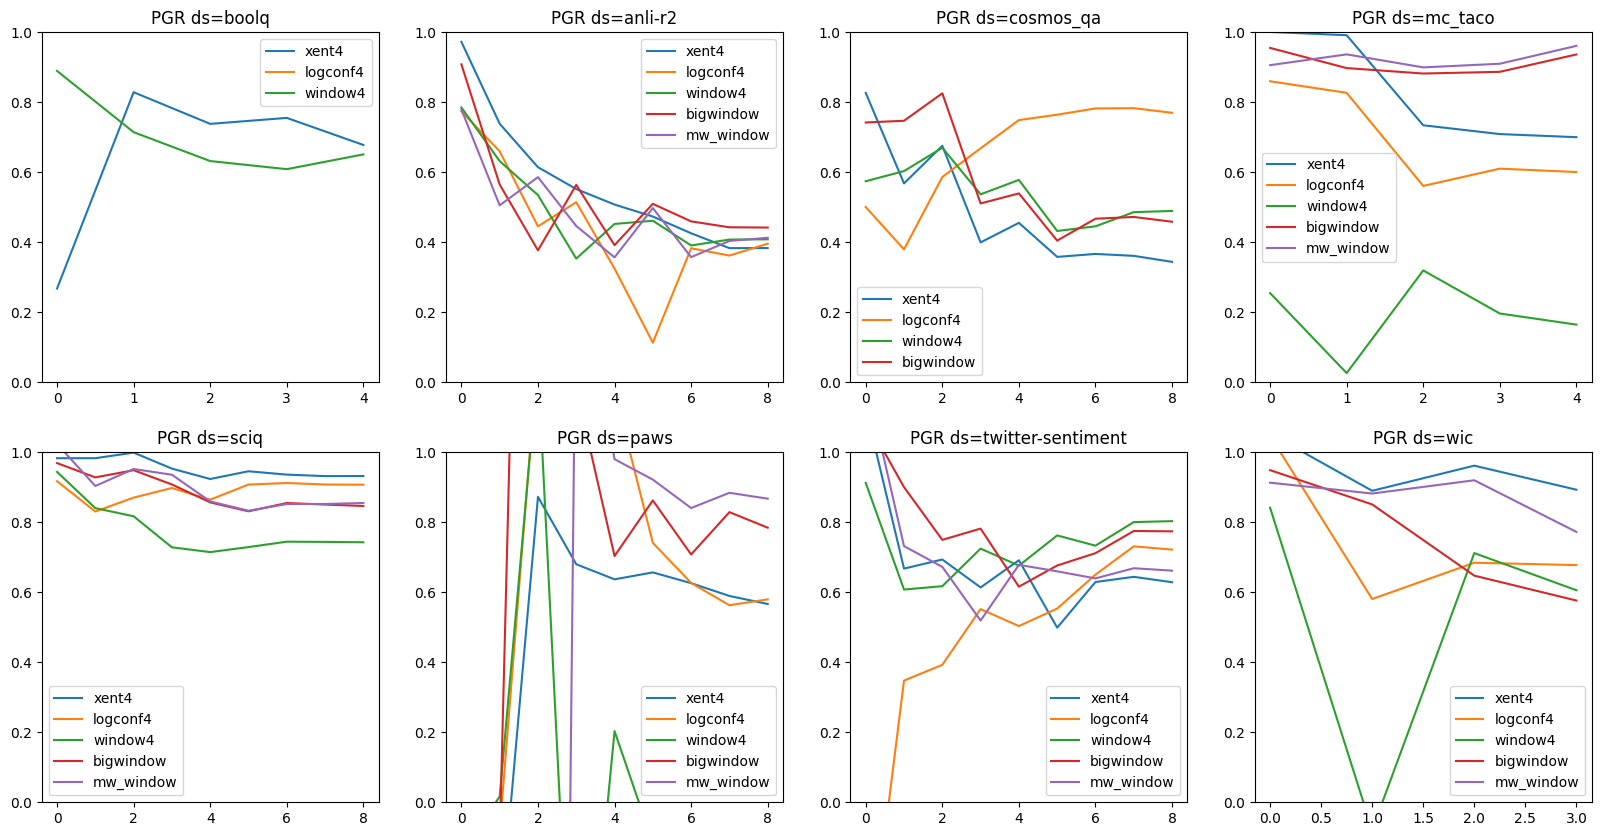

In [107]:
h, w = 2, 4
fig, axs = plt.subplots(h, w, figsize=(20, 10))
for i, ds in enumerate(pgrs):
    ax = axs[i // w, i % w]
    ax.set_ylim(0, 1)
    for rn in pgrs[ds]:
        pgr = pgrs[ds][rn]
        # pgr = npmax(0, pgr)
        ax.plot(pgr, label=rn)
    ax.legend()
    ax.set_title(f"PGR ds={ds}")
plt.show()

In [20]:
len(pgrs)

24

/tmp/ipykernel_1305931/2912376015.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


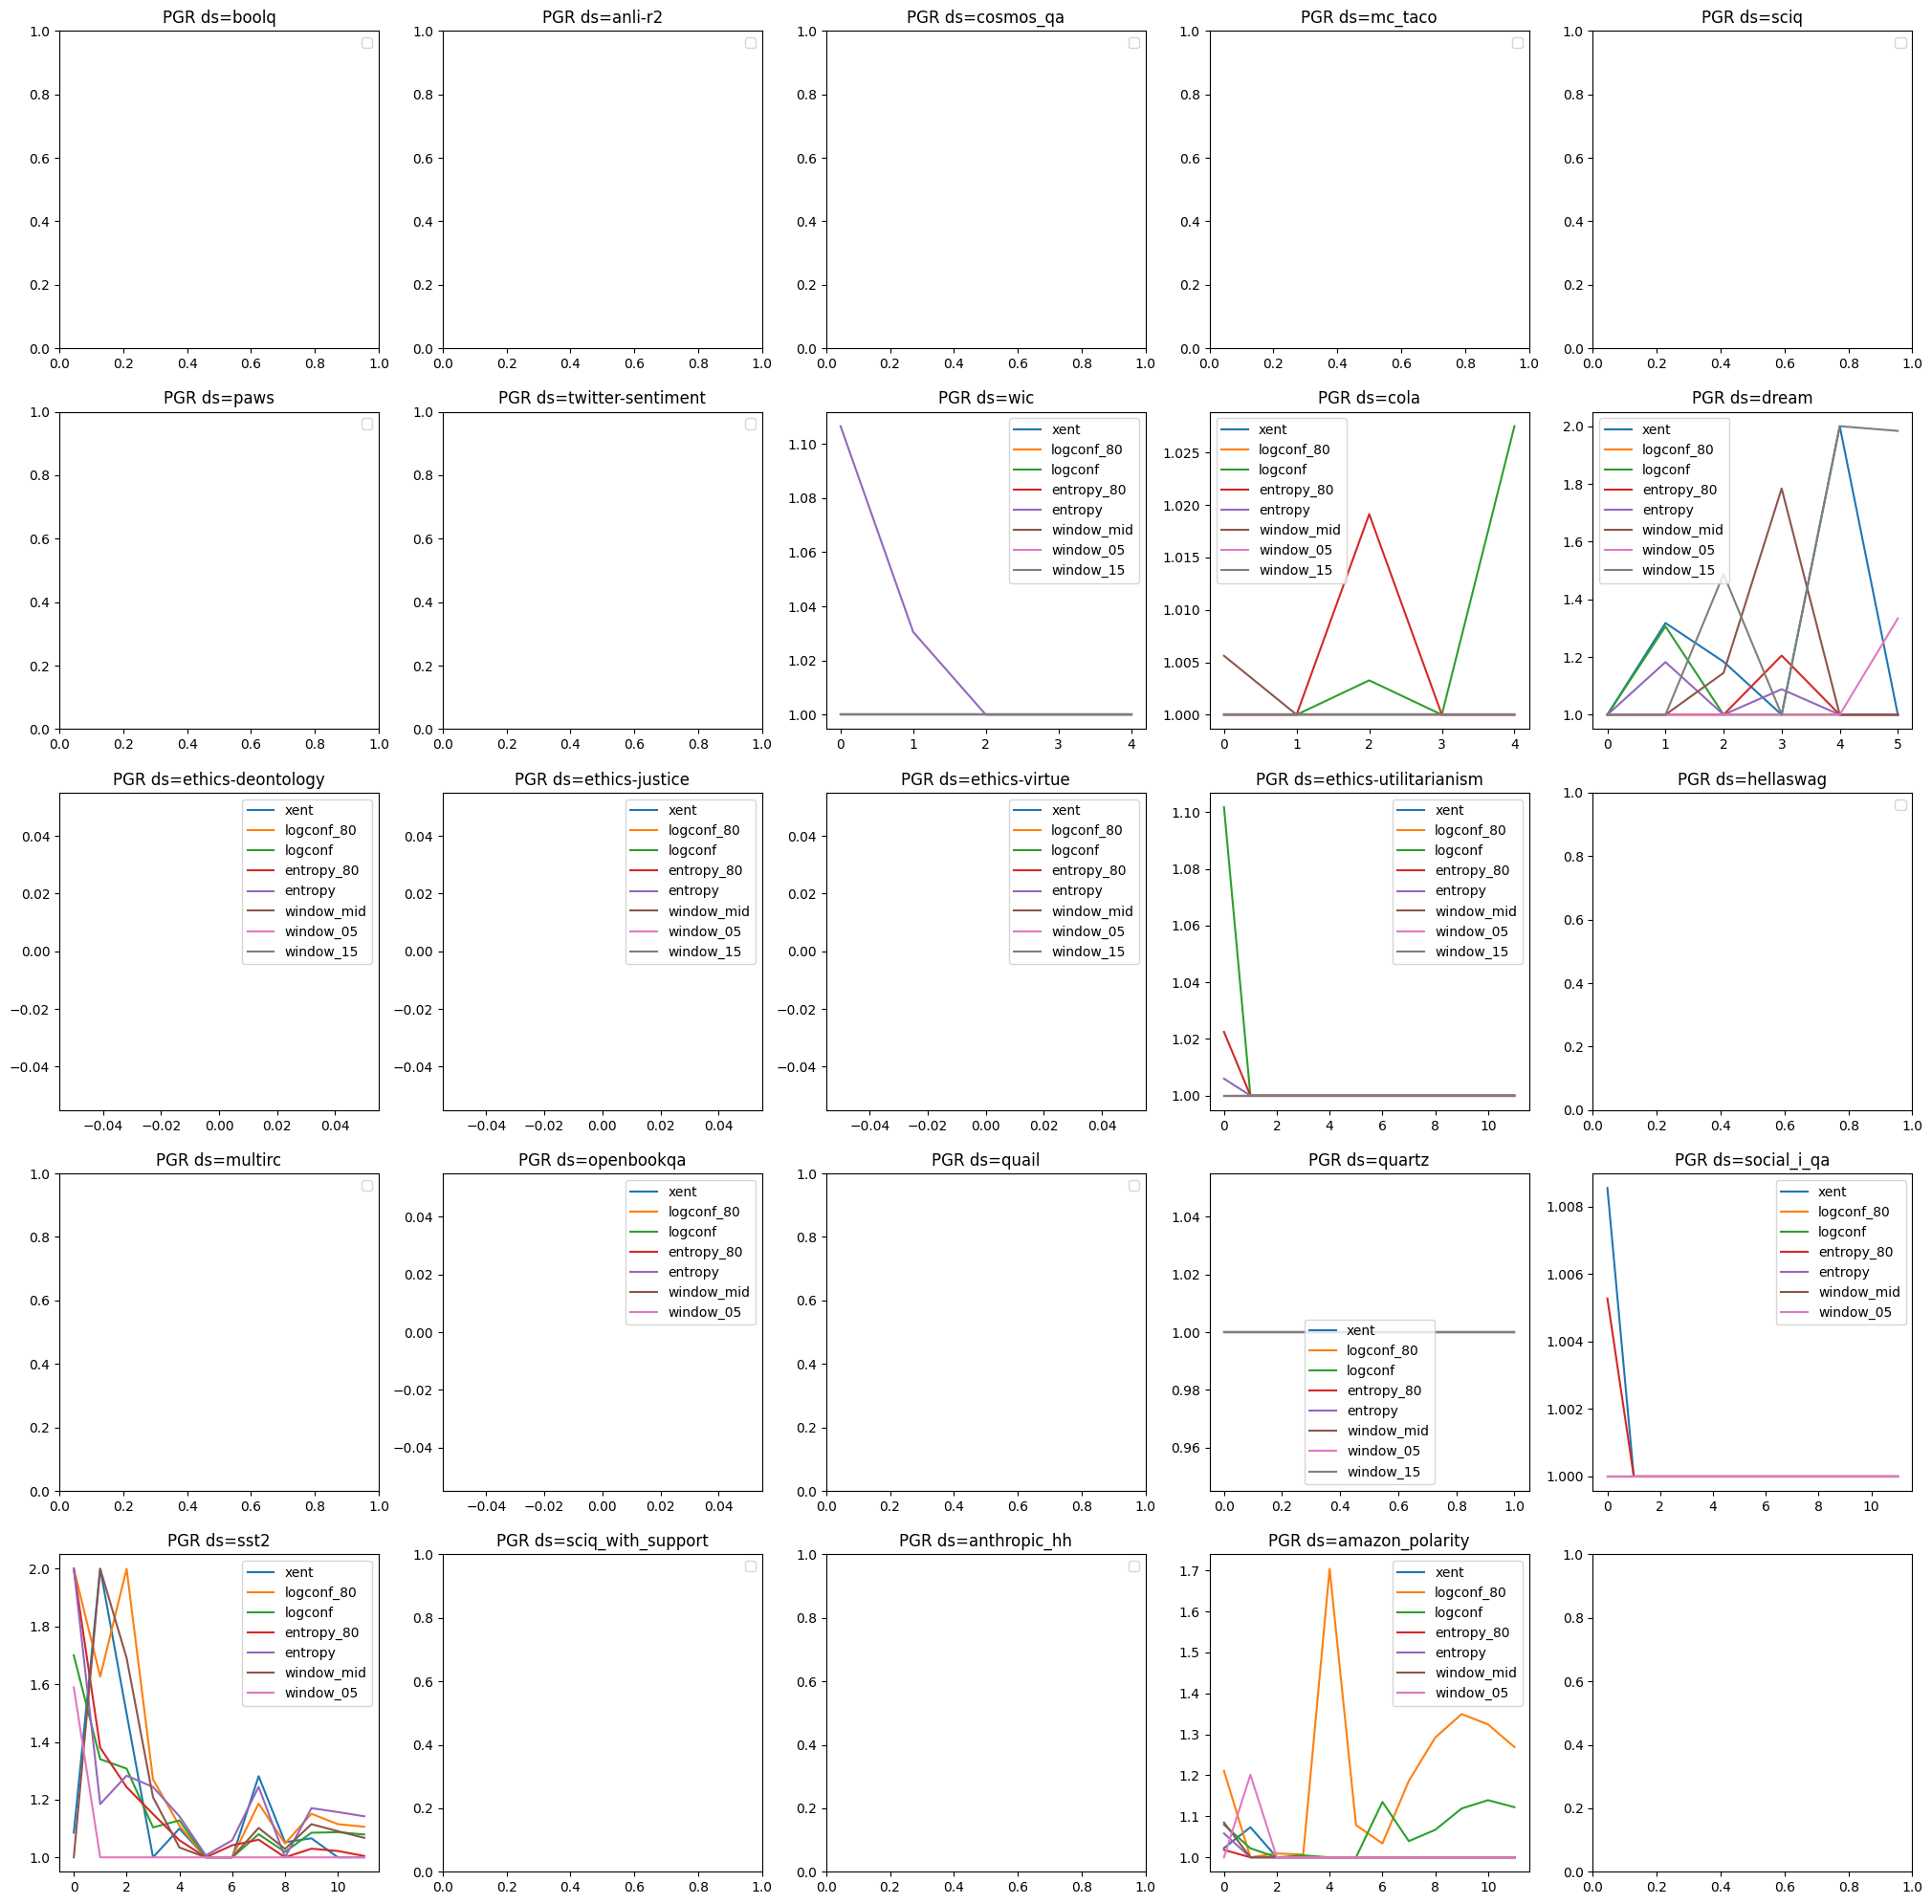

In [29]:
w = int(np.ceil(np.sqrt(len(pgrs))))
h = int(np.ceil(len(pgrs) / w))
fig, axs = plt.subplots(h, w, figsize=(5 * w, 5 * h))
for i, ds in enumerate(pgrs):
    ax = axs[i // w, i % w]
    #ax.set_ylim(0, 1)
    for rn in pgrs[ds]:
        pgr = pgrs[ds][rn]
        pgr = npmax(1, npmin(2, pgr))
        ax.plot(pgr, label=run_nick(rn))
    ax.legend()
    ax.set_title(f"PGR ds={ds}")
plt.show()